# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [3]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
# Crear nueva columna con la longitud de cada título
df['title_length'] = df['title'].apply(len)
df


,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",24
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",13
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",22
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",15
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",12
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",27
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",47
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [4]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df['title_length'].mean()
mediana = df['title_length'].median()
moda = df['title_length'].mode()[0]  #Se toma primer valor porque mode devuelve una serie

print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

Media: 15.481103166496425
Mediana: 14.0
Moda: 12


In [ ]:
# 
rango = df['title_length'].max() - df['title_length'].min()
varianza = df['title_length'].var()
desviacion = df['title_length'].std()

print(f"Rango: {rango}")
print(f"Varianza: {varianza}")
print(f"Desviación estándar: {desviacion}")


In [ ]:
# Calcula asimetría y curtosis de la columna 'title_length'
from scipy.stats import skew, kurtosis
asimetria = skew(df['title_length'])
curtosis = kurtosis(df['title_length'])  

print(f"Asimetría: {asimetria}")
print(f"Curtosis (exceso): {curtosis}")

Asimetría: 1.5229143965677572
Curtosis (exceso): 3.7867237597626007


In [ ]:
# Imprime el título más corto y el título más largo según su longitud
mas_corto = df.loc[df['title_length'].idxmin(), 'title']
mas_largo = df.loc[df['title_length'].idxmax(), 'title']

print(f"Título más corto: {mas_corto}")
print(f"Título más largo: {mas_largo}")

Título más corto: M
Título más largo: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


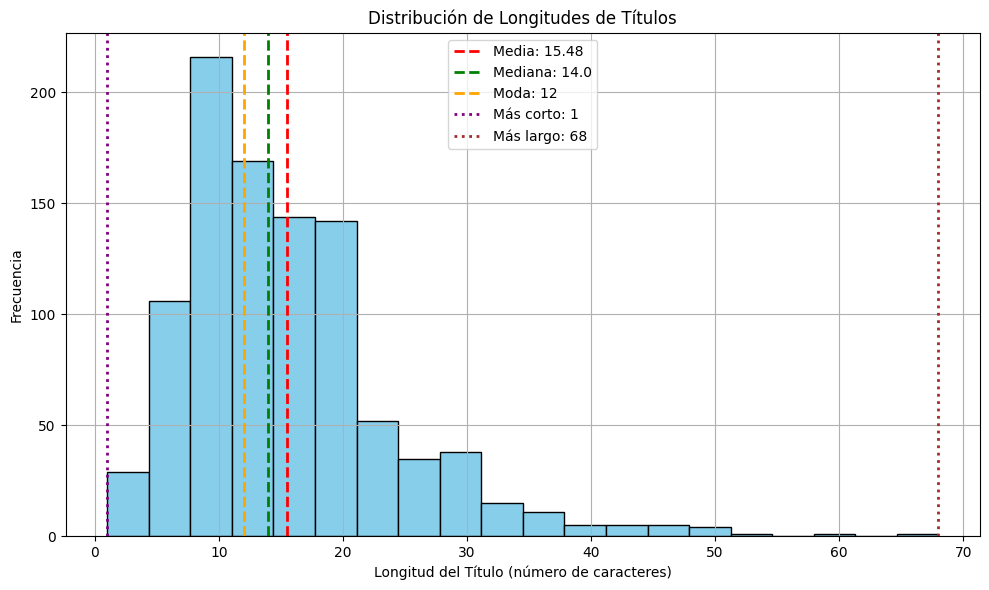

In [8]:
# grafica tus resultados
import matplotlib.pyplot as plt

# Calcular estadísticas básicas
media = df['title_length'].mean()
mediana = df['title_length'].median()
moda = df['title_length'].mode()[0]
min_len = df['title_length'].min()
max_len = df['title_length'].max()

# Histograma
plt.figure(figsize=(10, 6))
plt.hist(df['title_length'], bins=20, color='skyblue', edgecolor='black')

# Líneas de referencia
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana}')
plt.axvline(moda, color='orange', linestyle='--', linewidth=2, label=f'Moda: {moda}')
plt.axvline(min_len, color='purple', linestyle=':', linewidth=2, label=f'Más corto: {min_len}')
plt.axvline(max_len, color='brown', linestyle=':', linewidth=2, label=f'Más largo: {max_len}')

# Configurar gráfico
plt.title("Distribución de Longitudes de Títulos")
plt.xlabel("Longitud del Título (número de caracteres)")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [9]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]
valores = df['title_length'].sample(5, random_state=1).tolist()
print(valores)

[10, 15, 41, 30, 5]


In [10]:
# Calcula la media de los 5 valores
import statistics

valores = [10, 15, 41, 30, 5]
media = statistics.mean(valores)
print(f"Media: {media}")


Media: 20.2


In [12]:
# Calcula las diferencias al cuadrado con respecto a la media
media = 20.2
dif_cuadrado = [round((x - media)**2, 3) for x in valores]
print(dif_cuadrado)

[104.04, 27.04, 432.64, 96.04, 231.04]


In [ ]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación
import math
varianza = sum(dif_cuadrado) / len(valores)
desviacion = math.sqrt(varianza)

print(f"Varianza: {varianza:.3f}")
print(f"Desviación estándar: {desviacion:.3f}")


Varianza: 178.160
Desviación estándar: 13.348
